In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

### Bussiness Problem : 
### analisis dalam kondisi seperti apa seorang supir taksi dapat memperoleh jumlah tip yang lebih banyak? (data cleaning  + exploratory data analysis)

In [37]:
df = pd.read_csv('Taxi_Trip_Data.csv')
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


 ### Dataset ini berisi informasi terkait Vendor, Passanger Count, Trip Distance etc. Ada 18 kolom di dalam dataset Taxi_Trip_Data, yaitu:

* ID : Trip identification number.
* VendorID              : A code indicating the TPEP provider that provided the record.
                            1= Creative Mobile Technologies, LLC;
                            2= VeriFone Inc.
* tpep_pickup_datetime  : The date and time when the meter was engaged.
* tpep_dropoff_datetime : The date and time when the meter was disengaged.
* Passenger_count       : The number of passengers in the vehicle.
                            This is a driver-entered value.
* Trip_distance         : The elapsed trip distance in miles reported by the taximeter.
* PULocationID          : TLC Taxi Zone in which the taximeter was engaged.
* DOLocationID          : TLC Taxi Zone in which the taximeter was disengaged.
* RateCodeID            : The final rate code in effect at the end of the trip.
                            1= Standard rate
                            2=JFK
                            3=Newark
                            4=Nassau or Westchester
                            5=Negotiated fare
                            6=Group ride
* Store_and_fwd_flag    : This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store 
                            and forward,” because the vehicle did not have a connection to the server.
                            Y= store and forward trip
                            N= not a store and forward trip
* Payment_type          : A numeric code signifying how the passenger paid for the trip.
                            1= Credit card
                            2= Cash
                            3= No charge
                            4= Dispute
                            5= Unknown
                            6= Voided trip
* Fare_amount           : The time-and-distance fare calculated by the meter.
* Extra                 : Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
* MTA_tax               : $0.50 MTA tax that is automatically triggered based on the metered rate in use.
* Improvement_surcharge : $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
* Tip_amount            : Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
* Tolls_amount          : Total amount of all tolls paid in trip.
* Total_amount          : The total amount charged to passengers. Does not include cash tips.

## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Taxi_Trip_Data.

In [3]:
print(f'Jumlah baris dan kolom pada dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom pada dataset df adalah (22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 

In [4]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,22699,"[24870114, 35634249, 106203690, 38942136, 30841670, 23345809, 37660487, 69059411, 8433159, 95294817, 18017909, 18600059, 46782248, 94113247, 14168279, 47444401, 69088676, 58691513, 35388828, 18383214, 110690689, 85505540, 113074702, 54636365, 10565287, 111209513, 93194366, 99525452, 99074251, 94052446, 67540161, 35914864, 63600506, 90465096, 18173620, 93554066, 14770087, 14373799, 10421657, 103916069, 77743944, 15086430, 103823476, 34535675, 11969477, 68798000, 74499650, 3377025, 16623511, 34839590, 59540954, 27809467, 1361166, 25497357, 73498565, 69719738, 9517173, 19282330, 22352969, 17520716, 34663272, 32842627, 8467920, 83622942, 21974063, 110794327, 105212199, 74143232, 105476838, 65221014, 85218699, 66465797, 68455717, 34401650, 36762559, 48053276, 30892521, 15158530, 22166926, 2661149, 97134848, 90957858, 86230381, 79283387, 64344057, 74722231, 81447972, 69751803, 16215929, 16416397, 38609090, 60107150, 87475909, 10038766, 53636202, 20414683, 63683638, 105056260, 97913057, 22572601, ...]"
1,VendorID,2,"[2, 1]"
2,tpep_pickup_datetime,22687,"[03/25/2017 8:55:43 AM, 04/11/2017 2:53:28 PM, 12/15/2017 7:26:56 AM, 05/07/2017 1:17:59 PM, 04/15/2017 11:32:20 PM, 03/25/2017 8:34:11 PM, 05/03/2017 7:04:09 PM, 08/15/2017 5:41:06 PM, 02/04/2017 4:17:07 PM, 11/10/2017 3:20:29 PM, 03/04/2017 11:58:00 AM, 03/05/2017 7:15:30 PM, 06/09/2017 7:00:26 PM, 11/06/2017 11:35:05 PM, 02/22/2017 3:18:31 PM, 06/02/2017 6:41:39 AM, 08/15/2017 7:48:08 PM, 07/10/2017 1:36:31 PM, 04/10/2017 6:12:58 PM, 03/05/2017 4:01:07 AM, 12/30/2017 11:52:44 PM, 10/11/2017 12:34:49 PM, 01/06/2017 8:12:07 PM, 06/27/2017 12:08:22 AM, 02/13/2017 10:29:33 AM, 01/14/2017 7:58:42 PM, 11/04/2017 1:27:59 AM, 11/24/2017 10:48:13 AM, 11/22/2017 10:24:17 AM, 11/06/2017 8:30:50 PM, 08/09/2017 9:01:50 PM, 04/12/2017 11:07:56 AM, 07/26/2017 11:26:50 PM, 10/26/2017 7:43:07 PM, 03/04/2017 6:19:04 PM, 11/05/2017 1:35:25 AM, 02/24/2017 11:24:50 AM, 02/23/2017 8:04:57 AM, 02/12/2017 6:45:41 PM, 12/08/2017 12:21:55 PM, 09/15/2017 7:09:51 PM, 02/25/2017 7:41:32 AM, 12/08/2017 7:59:11 AM, 04/26/2017 11:18:27 AM, 02/15/2017 5:30:24 PM, 08/14/2017 5:15:32 PM, 09/05/2017 3:10:20 PM, 01/13/2017 2:37:24 AM, 03/11/2017 4:46:32 AM, 04/27/2017 7:26:57 AM, 07/13/2017 8:23:29 AM, 04/04/2017 4:22:03 PM, 01/05/2017 2:56:32 PM, 03/28/2017 7:10:03 PM, 09/01/2017 9:37:29 AM, 08/17/2017 10:06:12 PM, 02/10/2017 11:47:00 AM, 03/07/2017 8:19:42 PM, 03/18/2017 12:12:18 PM, 03/03/2017 8:02:59 AM, 04/26/2017 6:08:41 PM, 04/21/2017 3:08:21 PM, 02/04/2017 6:04:26 PM, 10/05/2017 9:39:28 AM, 03/17/2017 9:17:05 AM, 12/31/2017 1:03:12 PM, 12/12/2017 11:12:23 AM, 09/03/2017 11:15:56 PM, 12/13/2017 7:06:10 AM, 08/01/2017 6:09:45 PM, 10/10/2017 2:40:11 PM, 08/05/2017 10:28:06 PM, 08/13/2017 3:50:10 AM, 04/25/2017 10:20:43 PM, 05/01/2017 9:42:27 AM, 06/03/2017 6:55:02 PM, 04/16/2017 2:43:35 AM, 02/25/2017 1:04:27 PM, 03/17/2017 10:00:41 PM, 01/10/2017 9:06:58 PM, 11/16/2017 9:31:00 AM, 10/28/2017 4:16:54 AM, 10/13/2017 3:48:39 PM, 09/20/2017 11:46:44 PM, 07/29/2017 1:27:34 PM, 09/06/2017 11:37:10 AM, 09/28/2017 7:17:44 AM, 08/18/2017 1:17:32 AM, 02/28/2017 6:02:05 PM, 03/10/2017 6:31:50 PM, 05/06/2017 2:54:22 PM, 07/15/2017 12:28:27 AM, 10/17/2017 2:29:39 PM, 02/11/2017 7:09:12 PM, 06/23/2017 7:53:53 PM, 03/26/2017 8:06:55 PM, 07/27/2017 10:10:04 AM, 12/11/2017 8:04:27 PM, 11/18/2017 1:04:54 PM, 03/18/2017 11:41:50 PM, ...]"
3,tpep_dropoff_datetime,22688,"[03/25/2017 9:09:47 AM, 04/11/2017 3:19:58 PM, 12/15/2017 7:34:08 AM, 05/07/2017 1:48:14 PM, 04/15/2017 11:49:03 PM, 03/25/2017 8:42:11 PM, 05/03/2017 8:03:47 PM, 08/15/2017 6:03:05 PM, 02/04/2017 4:29:14 PM, 11/10/2017 3:40:55 PM, 03/04/2017 12:13:12 PM, 03/05/2017 7:52:18 PM, 06/09/2017 7:20:11 PM, 11/06/2017 11:42:57 PM, 02/22/2017 3:42:50 PM, 06/02/2017 6:57:47 AM, 08/15/2017 8:00:37 PM, 07/10/2017 1:48:43 PM, 04/10/2017 6:17:39 PM, 03/05/2017 4:14:11 AM, 12/30/2017 11:58:57 PM, 10/11/2017 1:22:38 P

### Data Cleaning

1. Kolom 'Unnamed: 0' dihapus karena tidak relevan.

In [5]:
# Menghapus kolom yang tidak relevan
df.drop(columns=['Unnamed: 0'], inplace=True)

2. Kolom 'tpep_pickup_datetime' dan 'tpep_dropoff_datetime' dikonversi ke dalam format datetime.

In [6]:
# Konversi pickup and dropoff datetime ke dalam datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

3. Tidak ada nilai yang hilang atau 'missing values' dalam dataset.

In [7]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


Nilai Negatif pada data

In [8]:
negative_values = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x < 0).sum())
print("Jumlah nilai negatif di tiap kolom:\n", negative_values)

Jumlah nilai negatif di tiap kolom:
 VendorID                  0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount              14
extra                     9
mta_tax                  13
tip_amount                0
tolls_amount              0
improvement_surcharge    14
total_amount             14
dtype: int64


Menghapus baris dengan nilai negatif pada kolom extra, mta_tax, improvement_surcharger, total_amount. Karena nilai negatif hanya muncul di sebagian kecil data.

In [9]:
# Menghapus baris dengan nilai negatif pada kolom extra, mta_tax, improvement_surcharger, total_amount
df = df[(df['extra'] >= 0) & (df['mta_tax'] >= 0) & (df['improvement_surcharge'] >= 0) & (df['total_amount'] >= 0)]


NIlai 0 pada data

In [10]:
zero_values = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x == 0).sum())
print("Jumlah nilai 0 di tiap kolom:\n", zero_values)

Jumlah nilai 0 di tiap kolom:
 VendorID                     0
passenger_count             33
trip_distance              147
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  6
extra                    11916
mta_tax                     89
tip_amount                8043
tolls_amount             21511
improvement_surcharge        6
total_amount                 4
dtype: int64


1. Ada 148 baris data dengan nilai trip_distance = 0, tetapi hanya 4 baris dengan total_amount = 0. Ini menunjukkan bahwa perjalanan tersebut memiliki data biaya meskipun tidak ada jarak perjalanan yang tercatat.

2. Kemungkinan Penyebab Nilai 0 pada trip_distance:
a. Perjalanan Minimum (Flat Fare): Perjalanan singkat yang tidak cukup jauh untuk mencatat jarak perjalanan tetapi tetap dikenakan biaya minimum.
b. Kesalahan Data: Sistem gagal atau rusak sehingga tidak mencatat jarak perjalanan.

### passenger_count

In [11]:
zero_passenger = df[df['passenger_count'] == 0].head()
print(zero_passenger[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']])

      fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
1516         33.0    0.0      0.5        5.55          5.76   
1874          7.0    0.0      0.5        0.00          0.00   
1925          5.0    0.5      0.5        0.00          0.00   
3352         12.5    0.5      0.5        2.75          0.00   
4060          9.0    0.0      0.5        1.95          0.00   

      improvement_surcharge  total_amount  
1516                    0.3         45.11  
1874                    0.3          7.80  
1925                    0.3          6.30  
3352                    0.3         16.55  
4060                    0.3         11.75  


In [12]:
# Menghitung jumlah data dengan ketentuan passenger_count = 0 dan total_amount = 0
count_invalid_rows = df[(df['passenger_count'] == 0) & (df['total_amount'] >= 0)].shape[0]

# Menampilkan hasil
print(f"Jumlah data dengan passenger_count = 0 dan total_amount >= 0: {count_invalid_rows}")


Jumlah data dengan passenger_count = 0 dan total_amount >= 0: 33


In [13]:
# Mengganti nilai 0 passenger_count dengan median
df['passenger_count'] = df['passenger_count'].apply(lambda x: df['passenger_count'].median() if x == 0 else x)

In [14]:
# Menghitung jumlah data dengan ketentuan passenger_count = 0 dan total_amount = 0
count_invalid_rows = df[(df['passenger_count'] == 0) & (df['total_amount'] >= 0)].shape[0]

# Menampilkan hasil
print(f"Jumlah data dengan passenger_count = 0 dan total_amount >= 0: {count_invalid_rows}")

Jumlah data dengan passenger_count = 0 dan total_amount >= 0: 0


### trip_distance

In [15]:
zero_distance = df[df['trip_distance'] == 0]
print(zero_distance[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']])

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
128           20.0    0.0      0.0        0.00           0.0   
246            2.5    0.5      0.5        0.00           0.0   
291            2.5    1.0      0.5        0.00           0.0   
319            2.5    0.5      0.5        0.00           0.0   
424            2.5    0.0      0.5        6.70           0.0   
...            ...    ...      ...         ...           ...   
22190          2.5    0.0      0.5        0.00           0.0   
22325         16.8    0.0      0.0        3.42           0.0   
22383         10.0    0.0      0.0        0.00           0.0   
22566          0.0    0.0      0.0        0.00           0.0   
22670          2.5    0.5      0.5        0.00           0.0   

       improvement_surcharge  total_amount  
128                      0.3         20.30  
246                      0.3          3.80  
291                      0.3          4.30  
319                      0.3          3.80  
424   

In [16]:
# Menghitung jumlah data dengan ketentuan trip_distance = 0 dan total_amount >= 0
count_valid_zero_distance = df[(df['trip_distance'] == 0) & (df['total_amount'] >= 0)].shape[0]

# Menampilkan hasil
print(f"Jumlah data dengan trip_distance = 0 dan total_amount >= 0: {count_valid_zero_distance}")


Jumlah data dengan trip_distance = 0 dan total_amount >= 0: 147


In [17]:
# Mengganti nilai 0 trip_distance dengan mean
df['trip_distance'] = df['trip_distance'].apply(lambda x: df['trip_distance'].mean() if x < 0 else x)

### fare_amount

In [18]:
# Menghitung jumlah data dengan ketentuan fare amount = 0 dan trip_distance >= 0
count_valid_zero_fare = df[(df['fare_amount'] == 0) & (df['trip_distance'] >= 0)].shape[0]

# Menampilkan hasil
print(f"Jumlah data dengan fare_amount = 0 dan trip_distance >= 0: {count_valid_zero_fare}")

Jumlah data dengan fare_amount = 0 dan trip_distance >= 0: 6


In [19]:
# Mengganti nilai 0 fare_amount dengan mean
df['fare_amount'] = df['fare_amount'].apply(lambda x: df['fare_amount'].mean() if x < 0 else x)

### total_amount

In [20]:
# Menghitung jumlah data dengan ketentuan total amount = 0 dan trip_distance >= 0
count_valid_zero_total = df[(df['total_amount'] == 0) & (df['trip_distance'] >= 0)].shape[0]

# Menampilkan hasil
print(f"Jumlah data dengan total_amount = 0 dan trip_distance >= 0: {count_valid_zero_total}")

Jumlah data dengan total_amount = 0 dan trip_distance >= 0: 4


In [21]:
# Mengganti nilai 0 total_amount dengan mean
df['total_amount'] = df['total_amount'].apply(lambda x: df['total_amount'].mean() if x < 0 else x)

1. Kolom seperti tip_amount: nilai negatif kemungkinan besar tidak valid (karena minimal tidak memberi tip atau tip = 0)
2. Kolom seperti extra: nilai 0 bisa valid (karena bisa jadi tidak ada tambahan biaya).

#### Jumlah nilai 0 di tiap kolom:

4. passenger_count             33 kalau 0 rasanya tidak dibutuhkan
5. trip_distance              148 Kalau 0, bisajadi taxi tidak jalan
6. fare_amount                  6 tidak valid, karena terdapat data dimana tercatat trip distance namun fare_amount nya tetap 0.
7. extra                    11921 valid, karena bisa saja tidak selalu menambahkan extra sehingga bisa jadi ada data yang bernilai 0
8. mta_tax           90 valid, karena bisa saja trip termasuk dalam kategori yang tidak terkena tax sehingga bisa jadi ada data yang bernilai 0
9. tip_amount                8057 valid, karena passenger tidak selalu memberikan tip sehingga bisa jadi ada data yang bernilai 0
10. tolls_amount             21525 valid, karena perjalanan tidak selalu melewati tol sehingga bisa jadi ada data yang bernilai 0
11. improvement_surcharge        6 valid
12. total_amount                 4 valid


Outlier

In [22]:
display(df.describe(),
df.describe(include='object'))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22685.000000,22685,22685,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000,22685.000000
mean,1.555962,2017-06-29 07:28:19.829182208,2017-06-29 07:45:17.525369088,1.643685,2.914952,1.043244,162.421732,161.544545,1.335552,13.041876,0.333723,0.498038,1.836914,0.312734,0.299921,16.328490
min,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2017-03-30 03:04:51,2017-03-30 03:08:13,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2017-10-02 10:17:30,2017-10-02 10:25:56,2.000000,3.070000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000
std,0.496869,NaN,NaN,1.283739,3.653698,0.708122,66.632736,70.136002,0.493288,13.212569,0.462812,0.031257,2.801119,1.399622,0.004878,16.068902


,store_and_fwd_flag
count,22685
unique,2
top,N
freq,22586


In [23]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,tpep_pickup_datetime,22673,"[2017-03-25 08:55:43, 2017-04-11 14:53:28, 2017-12-15 07:26:56, 2017-05-07 13:17:59, 2017-04-15 23:32:20, 2017-03-25 20:34:11, 2017-05-03 19:04:09, 2017-08-15 17:41:06, 2017-02-04 16:17:07, 2017-11-10 15:20:29, 2017-03-04 11:58:00, 2017-03-05 19:15:30, 2017-06-09 19:00:26, 2017-11-06 23:35:05, 2017-02-22 15:18:31, 2017-06-02 06:41:39, 2017-08-15 19:48:08, 2017-07-10 13:36:31, 2017-04-10 18:12:58, 2017-03-05 04:01:07, 2017-12-30 23:52:44, 2017-10-11 12:34:49, 2017-01-06 20:12:07, 2017-06-27 00:08:22, 2017-02-13 10:29:33, 2017-01-14 19:58:42, 2017-11-04 01:27:59, 2017-11-24 10:48:13, 2017-11-22 10:24:17, 2017-11-06 20:30:50, 2017-08-09 21:01:50, 2017-04-12 11:07:56, 2017-07-26 23:26:50, 2017-10-26 19:43:07, 2017-03-04 18:19:04, 2017-11-05 01:35:25, 2017-02-24 11:24:50, 2017-02-23 08:04:57, 2017-02-12 18:45:41, 2017-12-08 12:21:55, 2017-09-15 19:09:51, 2017-02-25 07:41:32, 2017-12-08 07:59:11, 2017-04-26 11:18:27, 2017-02-15 17:30:24, 2017-08-14 17:15:32, 2017-09-05 15:10:20, 2017-01-13 02:37:24, 2017-03-11 04:46:32, 2017-04-27 07:26:57, 2017-07-13 08:23:29, 2017-04-04 16:22:03, 2017-01-05 14:56:32, 2017-03-28 19:10:03, 2017-09-01 09:37:29, 2017-08-17 22:06:12, 2017-02-10 11:47:00, 2017-03-07 20:19:42, 2017-03-18 12:12:18, 2017-03-03 08:02:59, 2017-04-26 18:08:41, 2017-04-21 15:08:21, 2017-02-04 18:04:26, 2017-10-05 09:39:28, 2017-03-17 09:17:05, 2017-12-31 13:03:12, 2017-12-12 11:12:23, 2017-09-03 23:15:56, 2017-12-13 07:06:10, 2017-08-01 18:09:45, 2017-10-10 14:40:11, 2017-08-05 22:28:06, 2017-08-13 03:50:10, 2017-04-25 22:20:43, 2017-05-01 09:42:27, 2017-06-03 18:55:02, 2017-04-16 02:43:35, 2017-02-25 13:04:27, 2017-03-17 22:00:41, 2017-01-10 21:06:58, 2017-11-16 09:31:00, 2017-10-28 04:16:54, 2017-10-13 15:48:39, 2017-09-20 23:46:44, 2017-07-29 13:27:34, 2017-09-06 11:37:10, 2017-09-28 07:17:44, 2017-08-18 01:17:32, 2017-02-28 18:02:05, 2017-03-10 18:31:50, 2017-05-06 14:54:22, 2017-07-15 00:28:27, 2017-10-17 14:29:39, 2017-02-11 19:09:12, 2017-06-23 19:53:53, 2017-03-26 20:06:55, 2017-07-27 10:10:04, 2017-12-11 20:04:27, 2017-11-18 13:04:54, 2017-03-18 23:41:50, ...]"
2,tpep_dropoff_datetime,22674,"[2017-03-25 09:09:47, 2017-04-11 15:19:58, 2017-12-15 07:34:08, 2017-05-07 13:48:14, 2017-04-15 23:49:03, 2017-03-25 20:42:11, 2017-05-03 20:03:47, 2017-08-15 18:03:05, 2017-02-04 16:29:14, 2017-11-10 15:40:55, 2017-03-04 12:13:12, 2017-03-05 19:52:18, 2017-06-09 19:20:11, 2017-11-06 23:42:57, 2017-02-22 15:42:50, 2017-06-02 06:57:47, 2017-08-15 20:00:37, 2017-07-10 13:48:43, 2017-04-10 18:17:39, 2017-03-05 04:14:11, 2017-12-30 23:58:57, 2017-10-11 13:22:38, 2017-01-06 20:18:37, 2017-06-27 00:13:45, 2017-02-13 10:34:11, 2017-01-14 20:05:59, 2017-11-04 01:44:05, 2017-11-24 10:52:57, 2017-11-22 10:38:52, 2017-11-07 00:00:00, 2017-08-09 21:14:28, 2017-04-12 11:19:29, 2017-07-26 23:55:49, 2017-10-26 20:06:02, 2017-03-04 18:32:13, 2017-11-05 01:43:39, 2017-02-24 11:29:18, 2017-02-23 08:18:48, 2017-02-12 18:48:58, 2017-12-08 12:30:38, 2017-09-15 19:23:06, 2017-02-25 07:50:26, 2017-12-08 08:15:32, 2017-04-26 11:24:59, 2017-02-15 17:35:24, 2017-08-14 17:25:28, 2017-09-05 15:25:25, 2017-01-13 03:17:34, 2017-03-11 04:57:02, 2017-04-27 07:28:21, 2017-07-13 08:47:40, 2017-04-04 16:35:30, 2017-01-05 15:24:31, 2017-03-28 19:13:20, 2017-09-01 10:00:14, 2017-08-17 22:32:06, 2017-02-10 12:09:43, 2017-03-07 20:29:08, 2017-03-18 12:20:32, 2017-03-03 08:05:43, 2017-04-26 18:11:08, 2017-04-21 15:18:09, 2017-02-04 18:19:15, 2017-10-05 09:42:32, 2017-03-17 09:21:34, 2017-12-31 13:06:52, 2017-12-12 12:01:01, 2017-09-03 23:31:25, 2017-12-13 07:11:40, 2017-08-01 18:14:05, 2017-10-10 14:54:27, 2017-08-05 22:34:13, 2017-08-13 03:53:43, 2017-04-25 22:25:28, 2017-05-01 09:47:29, 2017-06-03 19:03:22, 2017-04-16 03:04:48, 2017-02-25 13:15:41, 2017-03-17 22:22:57, 2017-01-10 21:13:20, 2017-11-16 09:43:17, 2017-10-28 04:33:06, 2017-10-13 15:56:17, 2017-09-20 23:54:08, 2

In [24]:
# Menghitung jumlah data dengan ketentuan passenger_count = 0 dan total_amount = 0
count_invalid_rows = df[(df['passenger_count'] == 0) & (df['total_amount'] >= 0)].shape[0]

# Menampilkan hasil
print(f"Jumlah data dengan passenger_count = 0 dan total_amount >= 0: {count_invalid_rows}")

Jumlah data dengan passenger_count = 0 dan total_amount >= 0: 0


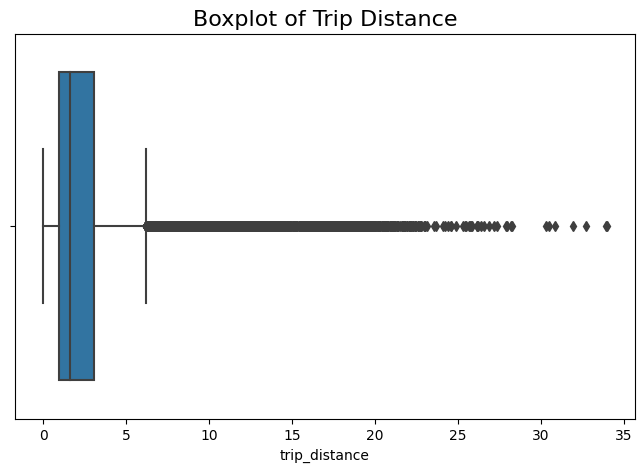

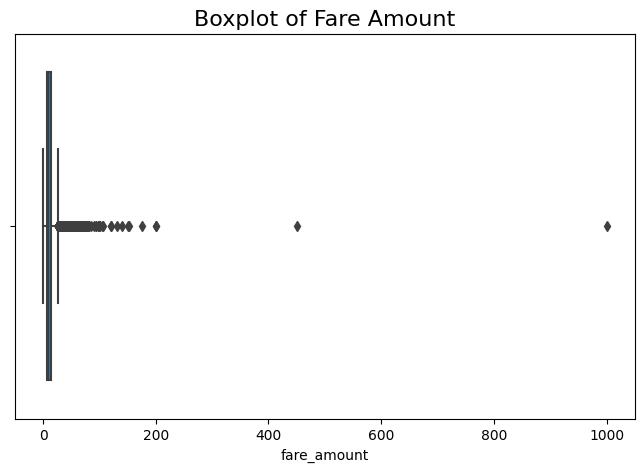

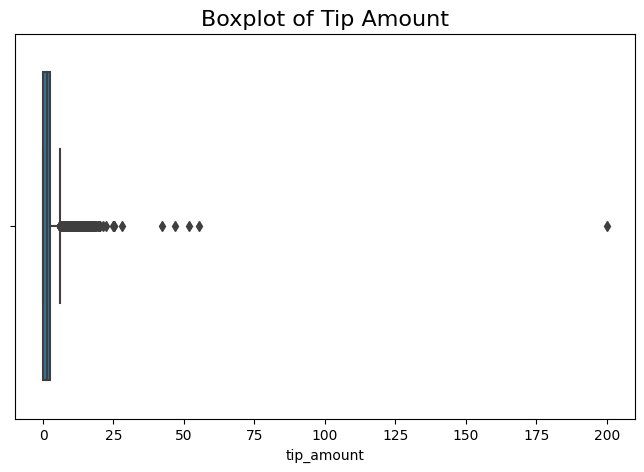

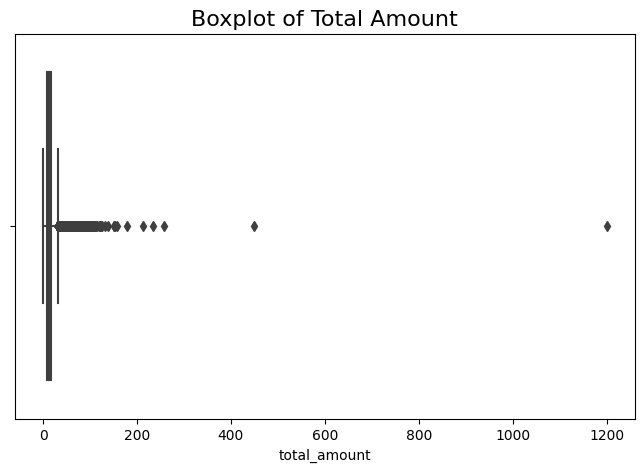

In [25]:
# Boxplot untuk kolom trip_distance
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['trip_distance'])
plt.title('Boxplot of Trip Distance', fontsize=16)
plt.show()

# Boxplot untuk kolom fare_amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount', fontsize=16)
plt.show()

# Boxplot untuk kolom tip_amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['tip_amount'])
plt.title('Boxplot of Tip Amount', fontsize=16)
plt.show()

# Boxplot untuk kolom total_amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['total_amount'])
plt.title('Boxplot of Total Amount', fontsize=16)
plt.show()

In [26]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Contoh untuk kolom trip_distance
outliers_trip_distance = detect_outliers(df, 'trip_distance')
outliers_fare_amount = detect_outliers(df, 'fare_amount')
outliers_tip_amount = detect_outliers(df, 'tip_amount')
outliers_total_amount = detect_outliers(df, 'total_amount')

print(f"Jumlah outlier pada trip_distance: {len(outliers_trip_distance)}")
print(f"Jumlah outlier pada fare_amount: {len(outliers_fare_amount)}")
print(f"Jumlah outlier pada tip_amount: {len(outliers_tip_amount)}")
print(f"Jumlah outlier pada total_amount: {len(outliers_total_amount)}")

# Kolom yang akan diperiksa
columns_to_check = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'passenger_count']

# Menyimpan hasil persentase outlier
outlier_percentage = {}

for column in columns_to_check:
    # Deteksi outlier
    outliers = detect_outliers(df, column)
    # Hitung persentase
    percentage = (len(outliers) / len(df)) * 100
    outlier_percentage[column] = percentage

# Menampilkan hasil persentase
for col, perc in outlier_percentage.items():
    print(f"Kolom: {col}, Persentase Outlier: {perc:.2f}%")

Jumlah outlier pada trip_distance: 2519
Jumlah outlier pada fare_amount: 2063
Jumlah outlier pada tip_amount: 1186
Jumlah outlier pada total_amount: 2156
Kolom: trip_distance, Persentase Outlier: 11.10%
Kolom: fare_amount, Persentase Outlier: 9.09%
Kolom: tip_amount, Persentase Outlier: 5.23%
Kolom: total_amount, Persentase Outlier: 9.50%
Kolom: passenger_count, Persentase Outlier: 10.09%


In [27]:
# Menghitung jumlah data dengan ketentuan total amount = 0 dan trip_distance >= 0
count_valid_outlier_fare = df[(df['fare_amount'] >= 400)].shape[0] # & (df['trip_distance'] >= 0)].shape[0]
# Menampilkan hasil
print(f"Jumlah data dengan fare_amount = 0 dan trip_distance >= 400: {count_valid_outlier_fare}")

Jumlah data dengan fare_amount = 0 dan trip_distance >= 400: 2


In [28]:
# Menghapus outliers dengan nilai fare_amount > 400 
df = df[(df['fare_amount'] <= 400)]

In [29]:
# Menghapus outliers dengan nilai tip_amount >= 50 
df = df[(df['tip_amount'] <= 50)]

In [30]:
# Menghapus outliers dengan nilai total_amount > 400 
df = df[(df['total_amount'] < 400)]

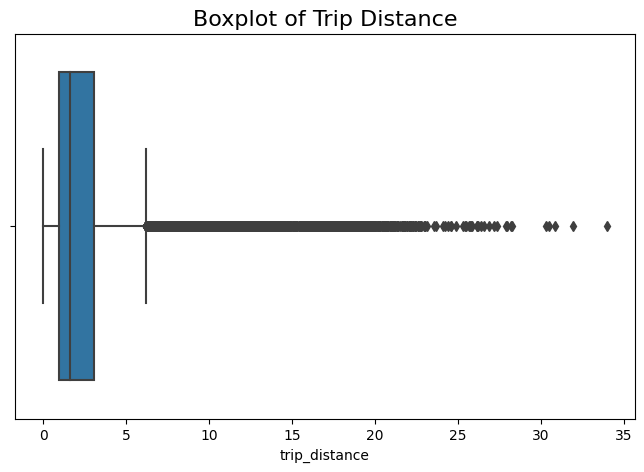

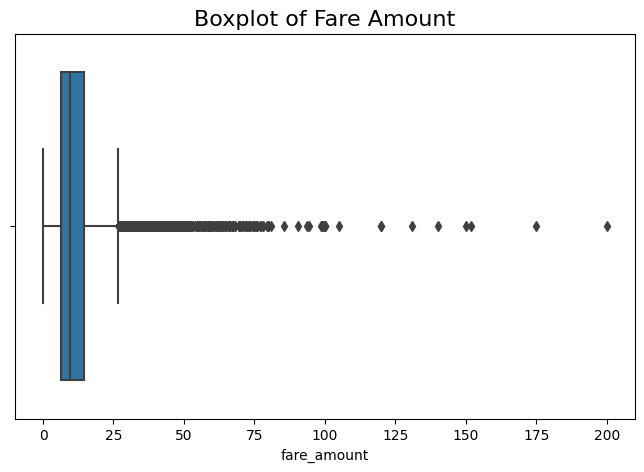

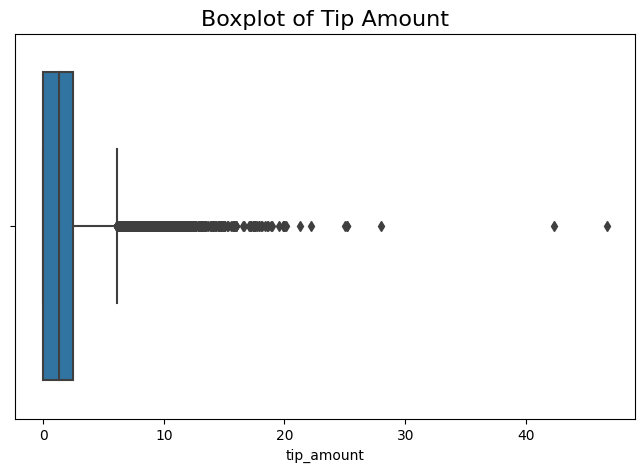

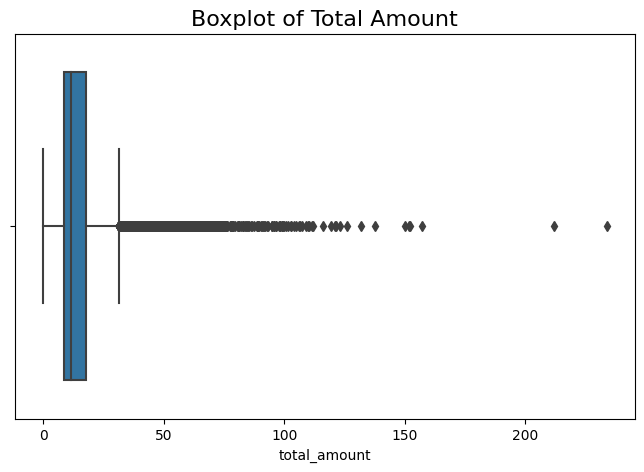

In [31]:
# Boxplot untuk kolom trip_distance
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['trip_distance'])
plt.title('Boxplot of Trip Distance', fontsize=16)
plt.show()

# Boxplot untuk kolom fare_amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount', fontsize=16)
plt.show()

# Boxplot untuk kolom tip_amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['tip_amount'])
plt.title('Boxplot of Tip Amount', fontsize=16)
plt.show()

# Boxplot untuk kolom total_amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['total_amount'])
plt.title('Boxplot of Total Amount', fontsize=16)
plt.show()

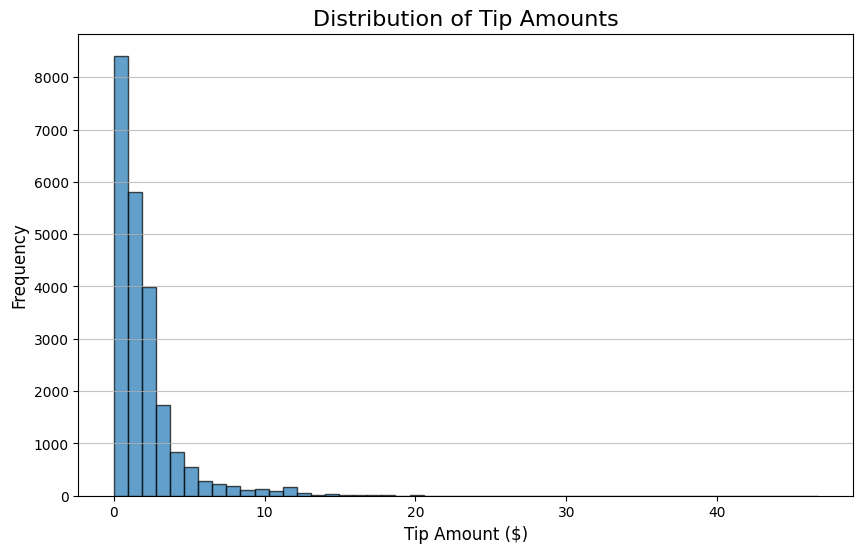

count    22681.000000
mean         1.823696
std          2.424783
min          0.000000
25%          0.000000
50%          1.350000
75%          2.450000
max         46.690000
Name: tip_amount, dtype: float64


In [32]:
# Plotting distribution of tip amount
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['tip_amount'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Tip Amounts', fontsize=16)
plt.xlabel('Tip Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Summary statistics for tip_amount
print(df['tip_amount'].describe())

Dari distribusi jumlah tip, berikut adalah beberapa pengamatan penting:

Rata-rata tip: $1.82
Median tip: $1.35
Tip minimum: $0.00
Tip maksimum: $46.69
Distribusi: Sebagian besar perjalanan memiliki tip kecil, dengan beberapa outlier yang cukup tinggi.

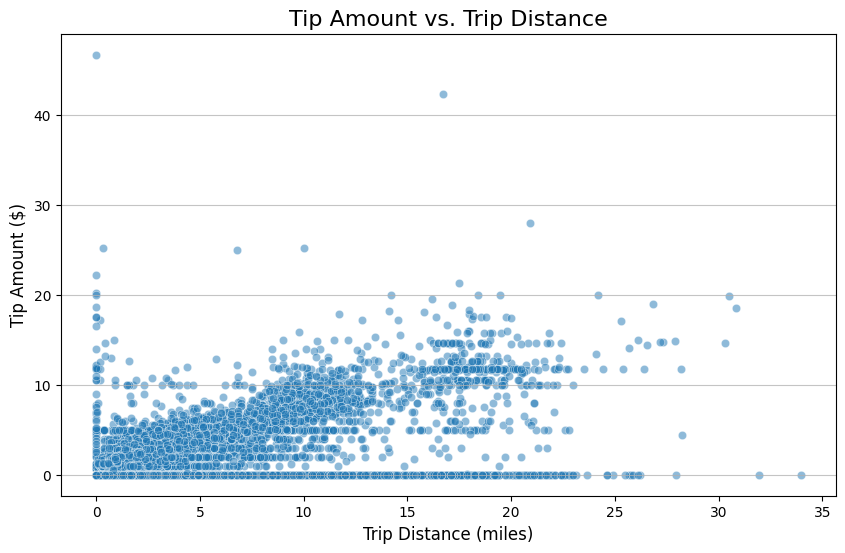

In [33]:
# Scatterplot for trip distance vs tip amount

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, alpha=0.5)
plt.title('Tip Amount vs. Trip Distance', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

Hasil analisis dan visualisasi menunjukkan:

Berdasarkan Jarak Perjalanan:
Tip cenderung meningkat seiring bertambahnya jarak perjalanan.
Ada beberapa outlier dengan jarak pendek tetapi jumlah tip tinggi.

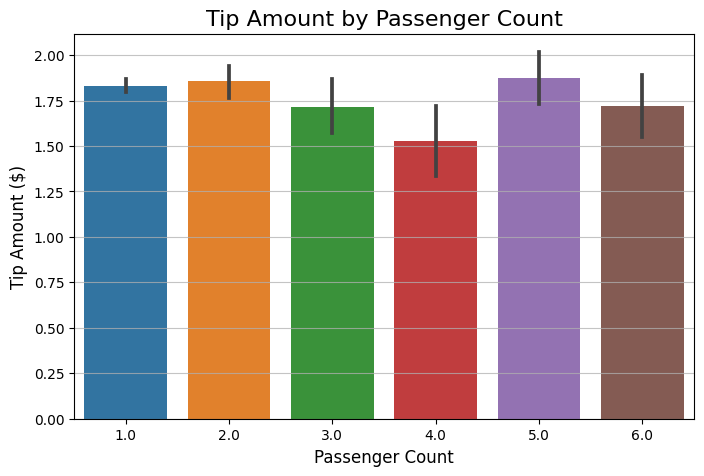

In [34]:
# Boxplot for passenger count vs tip amount
plt.figure(figsize=(8, 5))
sns.barplot(x='passenger_count', y='tip_amount', data=df)
plt.title('Tip Amount by Passenger Count', fontsize=16)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

Berdasarkan Jumlah Penumpang:
Penumpang tunggal (1 orang) memberikan tip yang lebih tinggi secara konsisten dibandingkan kelompok penumpang.



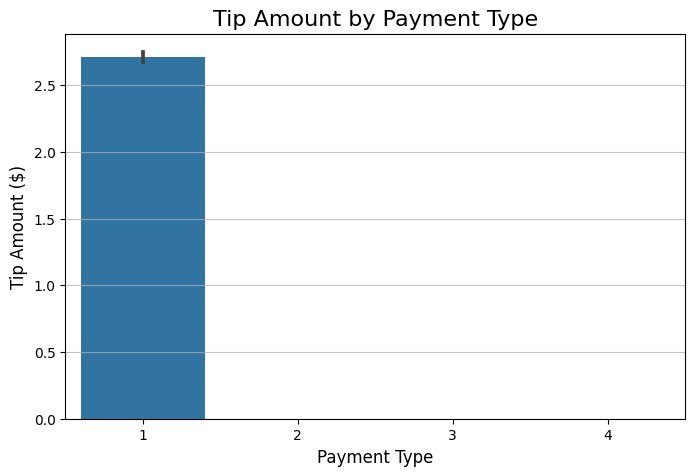

In [35]:
# Boxplot for payment type vs tip amount
plt.figure(figsize=(8, 5))
sns.barplot(x='payment_type', y='tip_amount', data=df)
plt.title('Tip Amount by Payment Type', fontsize=16)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()


Berdasarkan Metode Pembayaran:

Metode pembayaran memainkan peran penting dalam jumlah tip.
Umumnya, pembayaran elektronik (kartu kredit/debit) memiliki tip lebih tinggi dibandingkan pembayaran tunai.

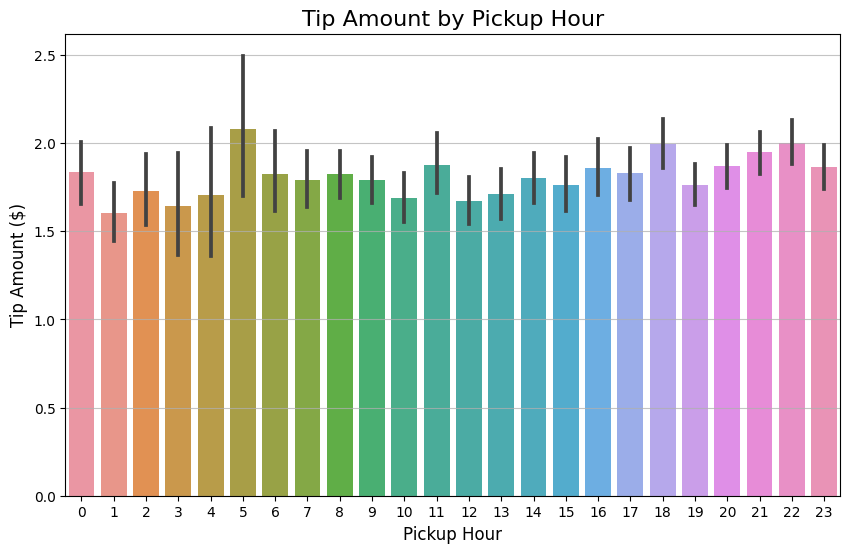

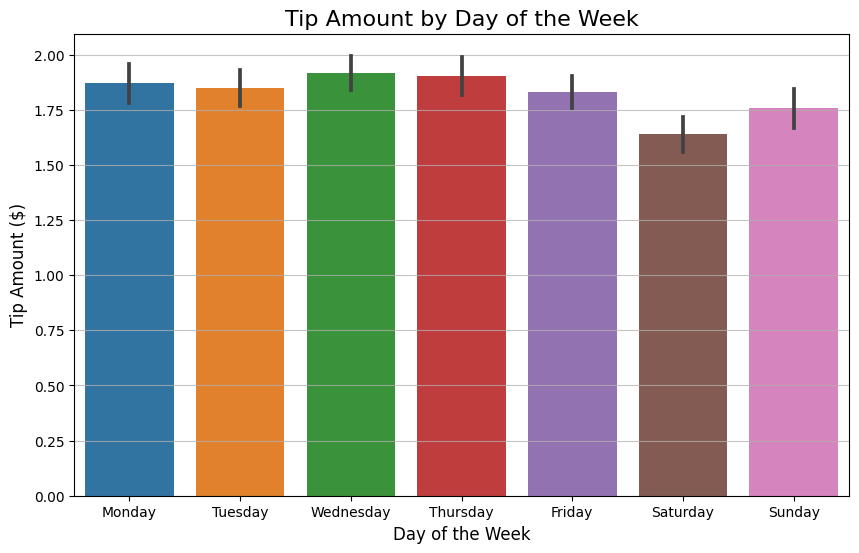

In [36]:
# Extracting hour and day of the week
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

# Boxplot for pickup hour vs tip amount
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_hour', y='tip_amount', data=df)
plt.title('Tip Amount by Pickup Hour', fontsize=16)
plt.xlabel('Pickup Hour', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Boxplot for pickup day vs tip amount
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_day', y='tip_amount', data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Tip Amount by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()


Hasil analisis pengaruh waktu perjalanan terhadap jumlah tip menunjukkan:

Jam Penjemputan:

Tip cenderung lebih tinggi pada malam hari (sekitar pukul 18:00 hingga 23:00), kemungkinan terkait dengan perjalanan pribadi atau hiburan.
Jam sibuk pagi (07:00-09:00) memiliki tip yang relatif rendah, mungkin karena perjalanan ke tempat kerja.

Hari dalam Seminggu:

Tip tertinggi biasanya terjadi pada akhir pekan, terutama pada hari Sabtu dan Minggu, yang mungkin disebabkan oleh perjalanan santai atau rekreasi.
Tip pada hari kerja cenderung lebih rendah.